<a href="https://colab.research.google.com/github/Youngkyun-Kwon/Data-Science-Portfolio/blob/main/Tweet_Classification_with_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RNN Text: Tweet Classification
**OPIM 5509: Introduction to Deep Learning - University of Connecticut**

Full Name: Your name here
Student ID (7 digit number): 2945105

-----------------------------------------------
As we learned text classification, you may be interested in classifying a real-world problem.
For your assignment, you are provided with a function to scrape tweets of certain users on Twitter. Use the function to scrape 2000 tweets for any two people you are interested in. Then save these tweets to your own drive as text files with two folders.

The rubric is shown below. 

## Rubric
**Part I: Data Preparation ( 35 points)**
* (5 points) Write a few lines about the two people/organizations you are going to scrape. Why are they of interest to you? Why should they be of interest to me?
* (10 points) Use the function to scrape 2000 tweets from each person/organization and save to your drive.
* (5 points) Load the data from your drive. 
* (15 points) Tokenize, pad the sequences and split data to training and validation. 
    * Make a shareable link clearly displayed at the top of your script so we can review your data, otherwise, no credit for this section. 

**Part II: Modeling (45 points)**
* (30 points) Fit three models with different architectures of varying complexity. Please have nice organized headers so I can grade it easily. You can do:
  * LSTM, GRU or SimpleRNN
  * Bidirectional LSTM or GRU
  * 1D Conv and Pooling
  * Pre-loaded word embeddings (i.e. GLOVE)
  * All of the above with stacked layers etc.

* (15 points) For each model you built, make a confusion matrix with report (like this: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)

**Tip:** You may get bad accuracy, also try to change the max length and most common words, this can make a difference sometimes. Do not worry about accuracy from the first model, just try to improve it in subsequent models. I am judging your code and logic not accuracy - it’s possible you can’t predict it!

**Part III: Analysis (20 points)**
* Write five to ten bullets to compare your results and discuss how you improve the models by changing the architectures.


In [ ]:
# good luck!

## **Link for the dataset:**
- Data Collection: https://drive.google.com/drive/folders/1BE9E0c5qdSkQl2-Zxk11Iw1kYiTIgLVy?usp=sharing

# **Introduction**

These days, there is a lot of misinformation about various topics such as vaccines and election on social networking services (SNS) and the Internet. In addition to that, bias in the news is also an issue for democracy because this could mean Americans are missing the full story. Instead of delivering the facts, some information already includes opinion or ideas that favor one party, causing viewers to be misinformed.

Fox News and CNN are the two most popular channels in the United States. According to the Hill-HarrisX poll, many respondents said CNN and Fox News have partisan media bias. Forty-eight percent of registered voters said Fox News has conservative media bias while 47 percent said CNN has liberal media bias (Gabriel, 2021).

Since the news spread fast on social networks, what they report on their SNS accounts are significantly influential. So, we are going to analyze tweets posted by the two channels and build a model to recognize which channel posted it. This model can be used to recognize the political views of other news channels, celebrities and so on.



# **Part I: Data Preparation**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Data Collection**

We will scrape 2000 tweets from each channel and save them to our drive using snscrape.

In [ ]:
# make a folder to store data
base_dir = '/content/drive/MyDrive/DeepLearning/RNN/M5.2/CNN_FOX'

import tensorflow as tf

#Create a new directory (a folder) in your Drive
tf.io.gfile.mkdir(base_dir)

#Combine the 2 strings
cnn_dir = base_dir + '/cnn/'

#Create the second directory
tf.io.gfile.mkdir(cnn_dir)

#Combine the 2 strings
fox_dir = base_dir + '/fox/'

#Create the second directory
tf.io.gfile.mkdir(fox_dir)

In [ ]:
!pip install snscrape
import snscrape.modules.twitter as sntwitter
import csv

In [ ]:
# CNN
maxTweets = 2000

# make sure you update the username and number of tweets!
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('from:@CNN + since:2021-01-20 until:2021-11-15-filter:links -filter:replies').get_items()):
  if i == maxTweets :
    break
  csvFile = open(cnn_dir + str(i) + '.csv', 'a', newline='', encoding='utf8')
  csvWriter = csv.writer(csvFile)
  csvWriter.writerow(['id','date','tweet',])
  csvWriter.writerow([tweet.id, tweet.date, tweet.content])
csvFile.close()

"maxTweets = 2000\n\n# make sure you update the username and number of tweets!\nfor i,tweet in enumerate(sntwitter.TwitterSearchScraper('from:@CNN + since:2021-01-20 until:2021-11-15-filter:links -filter:replies').get_items()):\n  if i == maxTweets :\n    break\n  csvFile = open(cnn_dir + str(i) + '.csv', 'a', newline='', encoding='utf8')\n  csvWriter = csv.writer(csvFile)\n  csvWriter.writerow(['id','date','tweet',])\n  csvWriter.writerow([tweet.id, tweet.date, tweet.content])\ncsvFile.close()"

In [ ]:
# FOX NEWS
# make sure you update the username and number of tweets!
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('from:@FoxNews + since:2021-01-20 until:2021-11-15-filter:links -filter:replies').get_items()):
  if i == maxTweets :
    break  
  csvFile = open(fox_dir + str(i) + '.csv', 'a', newline='', encoding='utf8')
  csvWriter = csv.writer(csvFile)
  csvWriter.writerow(['id','date','tweet',])
  csvWriter.writerow([tweet.id, tweet.date, tweet.content])
csvFile.close()

"# make sure you update the username and number of tweets!\nfor i,tweet in enumerate(sntwitter.TwitterSearchScraper('from:@FoxNews + since:2021-01-20 until:2021-11-15-filter:links -filter:replies').get_items()):\n  if i == maxTweets :\n    break  \n  csvFile = open(fox_dir + str(i) + '.csv', 'a', newline='', encoding='utf8')\n  csvWriter = csv.writer(csvFile)\n  csvWriter.writerow(['id','date','tweet',])\n  csvWriter.writerow([tweet.id, tweet.date, tweet.content])\ncsvFile.close()"

In [ ]:
# check the oldest date 
import pandas as pd
cnn_last = pd.read_csv('/content/drive/MyDrive/DeepLearning/RNN/M5.2/CNN_FOX/cnn/1999.csv')
print(cnn_last['date'])
fox_last = pd.read_csv('/content/drive/MyDrive/DeepLearning/RNN/M5.2/CNN_FOX/fox/1999.csv')
print(fox_last['date'])

0    2021-10-23 19:43:05+00:00
Name: date, dtype: object
0    2021-10-25 00:19:50+00:00
Name: date, dtype: object


The tweets of CNN are scraped from October 23th to November 15th while those of FOX are scraped from October 25th to November 15th.

## **Loading data**

Now let's collect each tweet into a list of strings, one string per tweet, and let's also collect the review labels (cnn / fox) into a labels list. Since we have id and date information as well, we will remove them.

In [ ]:
#Load the data you just saved from the drive
import os

my_dir = base_dir

labels = []
texts = []
count = 0
for label_type in ['cnn/', 'fox/']:
    dir_name = os.path.join(my_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.csv':
            count = count + 1
            print(count)
            f = open(os.path.join(dir_name, fname))
            s = f.read()
            s = s.split(",",4)
            texts.append(s[4]) # get only tweets
            f.close()
            if label_type == 'cnn/':
                labels.append(0)
            else:
                labels.append(1)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


## **Explanatory Data Analysis**

### Data Cleaning

In [ ]:
# make them a dataframe 
dic={'Label':labels,'Text':texts}
df=pd.DataFrame(dic)

In [ ]:
# let's see what we did
print(df['Text'][0])
print(df['Text'][1])
print(df['Text'][2])

"Billionaire Charlie Munger is a big fan of how China manages its economy.
https://t.co/x1XyIXfPFt"

"Jeff Bezos offered Tom Hanks a ride to space on his Blue Origin rocket, but it came at a price.
https://t.co/92ZwO0eKqR"

"The fourth annual #CitizenCNN Conference is this Thursday. Join us starting at 8:30 a.m. ET for conversations with newsmakers and featured guests including Glenn Close, Brad Raffensperger, Ken Burns, Nneka Ogwumike and more. 

RSVP at https://t.co/lEGASjmQIf https://t.co/aiV3k0vL5B"



There are URLs, commas, quotation marks and so on. We will remove them and make them lowercase. We will also get rid of stopwords such as 'a', 'the', 'is', etc. which are not informative. 

In [ ]:
# remove URLs
for i in range(0,len(df)):
  df['Text'][i] = df['Text'][i].split('https')[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# remove any funky characters with a blank
df['Text'] = df['Text'].str.replace('[^A-z ]','').str.replace(' +',' ').str.strip()
df['Text'].head()

0    Billionaire Charlie Munger is a big fan of how...
1    Jeff Bezos offered Tom Hanks a ride to space o...
2    The fourth annual CitizenCNN Conference is thi...
3    House Speaker Nancy Pelosi has announced that ...
4    Statesspecific election rules A pandemic Misin...
Name: Text, dtype: object

In [ ]:
# make everything lowercase
df['Text'] = df['Text'].str.lower()
print(df['Text'][0])
print(df['Text'][1])
print(df['Text'][2])

billionaire charlie munger is a big fan of how china manages its economy
jeff bezos offered tom hanks a ride to space on his blue origin rocket but it came at a price
the fourth annual citizencnn conference is this thursday join us starting at am et for conversations with newsmakers and featured guests including glenn close brad raffensperger ken burns nneka ogwumike and more rsvp at


In [ ]:
# let's remove some of the stop words
import nltk
from nltk.corpus import stopwords


nltk.download('stopwords') # download stopwords
print(stopwords.words('english'))

stop = stopwords.words('english') # let's see what they are

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'bo

In [ ]:
# adds a space between selected words
df['Text'] = df['Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)])) 
df.head()

,Label,Text
0,0,billionaire charlie munger big fan china manag...
1,0,jeff bezos offered tom hanks ride space blue o...
2,0,fourth annual citizencnn conference thursday j...
3,0,house speaker nancy pelosi announced four week...
4,0,statesspecific election rules pandemic misinfo...


In [ ]:
# seperate tweets into each class
df_cnn=df[df.Label==0]
df_fox=df[df.Label==1]

In [ ]:
# select top50 words for each class
cnn=pd.Series(' '.join(df_cnn.Text).split()).value_counts()[:50]
fox=pd.Series(' '.join(df_fox.Text).split()).value_counts()[:50]

In [ ]:
# convert them to dataframes
cnn=pd.DataFrame(cnn,columns=['CNN'])
fox=pd.DataFrame(fox,columns=['FOX'])

In [ ]:
# renames columns
cnn.reset_index(inplace=True)
cnn.columns = ['words','fre']
fox.reset_index(inplace=True)
fox.columns = ['words','fre']
print(cnn.head())
print(fox.head())

       words  fre
0        new  301
1         us  208
2  president  142
3      covid  138
4      first  136
      words  fre
0     biden  176
1      says  160
2  virginia  105
3    police   97
4       new   88


### Most common words

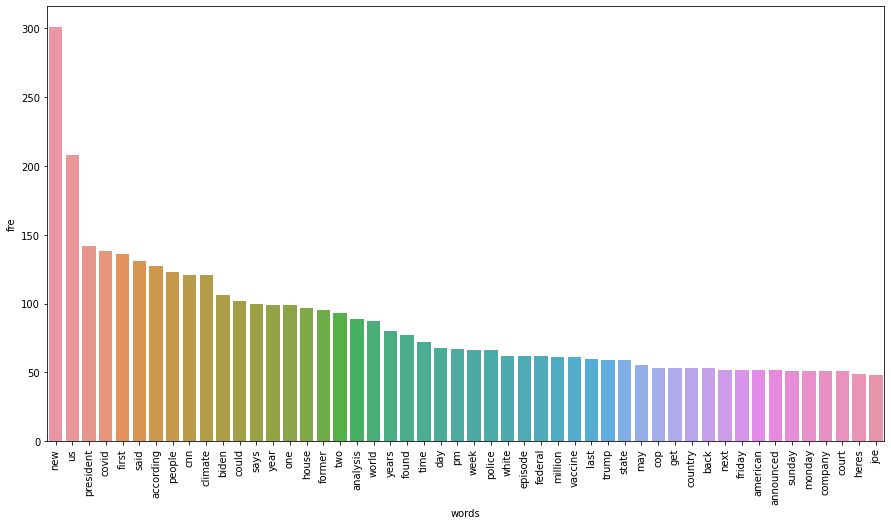

In [ ]:
# show a plot of top50 words for CNN
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
ax = sns.barplot(x=cnn['words'], y=cnn['fre'], data=cnn)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

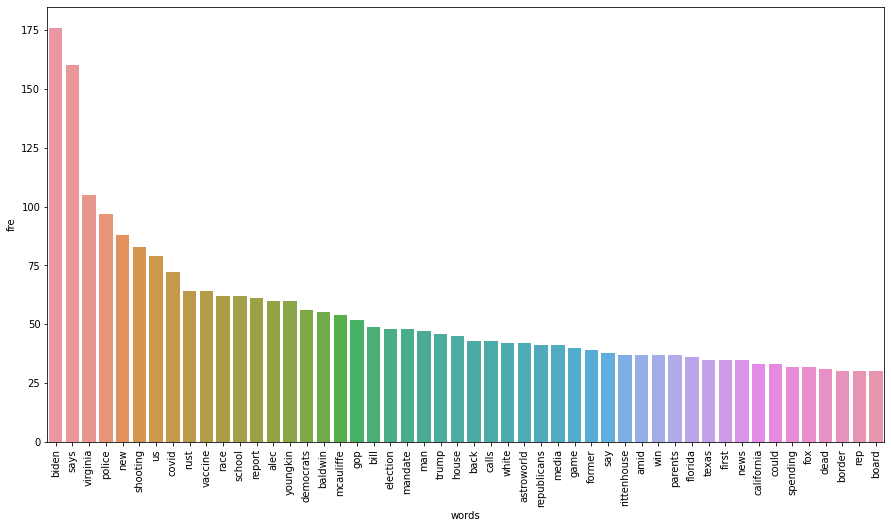

In [ ]:
# show a plot of top50 words for FOX
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
ax = sns.barplot(x=fox['words'], y=fox['fre'], data=cnn)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

### Word Cloud

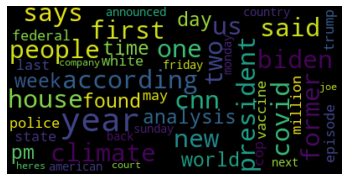

In [ ]:
from wordcloud import WordCloud

# Generate a word cloud image
wordcloud = WordCloud().generate(' '.join(cnn['words']))

# # Display the generated image:
# # the matplotlib way:
# import matplotlib.pyplot as plt
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(' '.join(cnn['words']))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

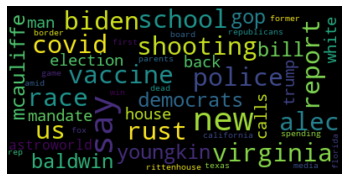

In [ ]:
from wordcloud import WordCloud

# Generate a word cloud image
wordcloud = WordCloud().generate(' '.join(fox['words']))

# # Display the generated image:
# # the matplotlib way:
# import matplotlib.pyplot as plt
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(' '.join(fox['words']))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

- Interestingly, Fox news has the word 'biden' as the most frequent word but CNN shows the word 'president' was more frequently shown in tweets. It seems that Fox news doesn't use titles when calling president Joe Biden, while CNN does.
- CNN has the words 'climate' and 'world' at the top of rank so it seems that CNN reports world issues more than Fox news does.
- Fox news has the words 'virginia', 'police', 'shooting','youngkin','mandate' and 'school' at the top of rank so it seems that Fox news reports domestic controversial issues more than CNN does.
- CNN has some time words such as day, pm, week, friday, monday, and sunday that Fox news doesn't have. We can assume that CNN tends to report descriptive news.

## **Preparation for modeling**

### Tokenizer
The tokenizer takes a given sentence and parses it into a list with individual words separated by a comma. This makes it easy for us to do some feature engineering later on in the notebook.

In [ ]:
# Tokenize, pad and prepare training and validation data
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 100
validation_samples = 1000  # We will be validating on 1000 samples
max_words = 10000 

tokenizer = Tokenizer(num_words=max_words)

# fit_on_texts means it learns the indices of the words
tokenizer.fit_on_texts(df['Text'])

# the sequences are comprised of those indices
sequences = tokenizer.texts_to_sequences(df['Text'])

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

# in case of low word counts, we need to pad sequences
# so that they are uniform length
data = pad_sequences(sequences, maxlen=maxlen)

# our labels, which were previously stored as a list [],
# are now converted to a numpy array for modeling
labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

Found 11068 unique tokens.
Shape of data tensor: (4000, 100)
Shape of label tensor: (4000,)


### Train and Validation Partition

In [ ]:
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

training_samples = 3000  # We will be training on 3000 samples

x_train = data[:training_samples] # from 0 to training samples
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

In [ ]:
print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(3000, 100) (3000,)
(1000, 100) (1000,)


# **Part II: Modeling**

We are going to build five models and choose the best model based on metrics of model accuracy and overfitting. 

- Simple RNN Model
- LSTM Model
- GRU Model
- Pre-trained Model with GLOVE
- Monster Model

In [ ]:
# import modules for modeling
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, GRU, Flatten, Dense, LSTM, Conv1D, MaxPooling1D, Dropout, Bidirectional

## **Simple RNN Model**

In [ ]:
# define model
model = Sequential()
model.add(Embedding(max_words, 32, input_length=maxlen))
model.add(SimpleRNN(64))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_data=(x_val, y_val))

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 100, 32)           320000    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 64)                6208      
                                                                 
 dense_10 (Dense)            (None, 1)                 65        
                                                                 
Total params: 326,273
Trainable params: 326,273
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
24/24 [==============================] - 3s 66ms/step - loss: 0.5187 - acc: 0.7753 - val_loss: 0.3675 - val_acc: 0.8690
Epoch 2/10
24/24 [==============================] - 2s 65ms/step - loss: 0.3630 - acc: 0.8603 - val_loss: 0.3151 - val_acc: 0.8890
Epoch 3/10
24/24 [==============================] 

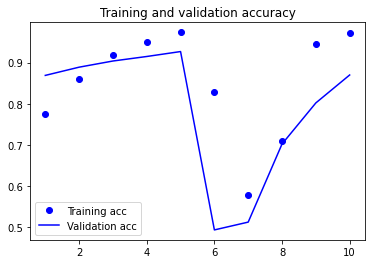

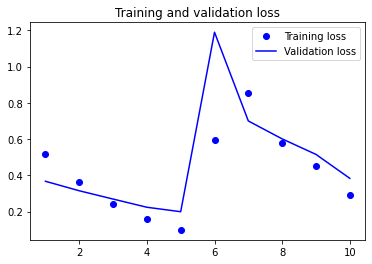

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# classification report and confusion matrix
from sklearn.metrics import confusion_matrix

# if we don't round to a whole number (0 or 1), the confusion matrix won't work!
preds1 = np.round(model.predict(x_val),0)

In [ ]:
# confusion matrix 
matrix = confusion_matrix(y_val, preds1)
matrix

array([[397,  94],
       [ 36, 473]])

In [ ]:
# classification report 
from sklearn.metrics import classification_report

# more detail on how well things were predicted
print(classification_report(y_val, preds1))

              precision    recall  f1-score   support

           0       0.92      0.81      0.86       491
           1       0.83      0.93      0.88       509

    accuracy                           0.87      1000
   macro avg       0.88      0.87      0.87      1000
weighted avg       0.87      0.87      0.87      1000



## **LSTM Model**

In [ ]:
# define model
model = Sequential()
model.add(Embedding(max_words, 128, input_length=maxlen))
model.add(LSTM(64, dropout=0.1, recurrent_dropout=0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_data=(x_val, y_val))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 128)          1280000   
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,331,521
Trainable params: 1,331,521
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
24/24 [==============================] - 13s 418ms/step - loss: 0.5955 - acc: 0.7367 - val_loss: 0.4368 - val_acc: 0.8250
Epoch 2/10
24/24 [=========================

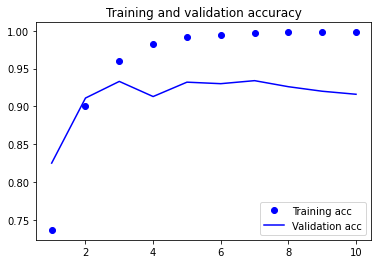

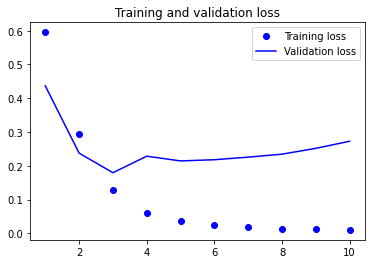

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# classification report and confusion matrix

# if we don't round to a whole number (0 or 1), the confusion matrix won't work!
preds2 = np.round(model.predict(x_val),0)

In [ ]:
# confusion matrix 
matrix = confusion_matrix(y_val, preds2)
matrix

array([[439,  52],
       [ 32, 477]])

In [ ]:
# classification report 

# more detail on how well things were predicted
print(classification_report(y_val, preds2))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       491
           1       0.90      0.94      0.92       509

    accuracy                           0.92      1000
   macro avg       0.92      0.92      0.92      1000
weighted avg       0.92      0.92      0.92      1000



## **GRU Model**

In [ ]:
# define model
model = Sequential()
model.add(Embedding(max_words, 128, input_length=maxlen))
model.add(GRU(64, dropout=0.1, recurrent_dropout=0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_data=(x_val, y_val))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 128)          1280000   
                                                                 
 gru (GRU)                   (None, 64)                37248     
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,319,361
Trainable params: 1,319,361
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
24/24 [==============================] - 12s 373ms/step - loss: 0.6799 - acc: 0.6320 - val_loss: 0.6292 - val_acc: 0.7830
Epoch 2/10
24/24 [=========================

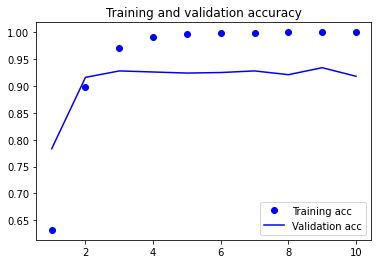

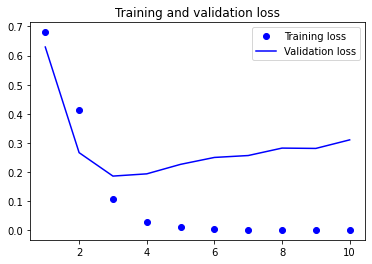

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# classification report and confusion matrix

# if we don't round to a whole number (0 or 1), the confusion matrix won't work!
preds3 = np.round(model.predict(x_val),0)

In [ ]:
# confusion matrix 
matrix = confusion_matrix(y_val, preds3)
matrix

array([[464,  27],
       [ 55, 454]])

In [ ]:
# classification report 

# more detail on how well things were predicted
print(classification_report(y_val, preds3))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       491
           1       0.94      0.89      0.92       509

    accuracy                           0.92      1000
   macro avg       0.92      0.92      0.92      1000
weighted avg       0.92      0.92      0.92      1000



## **Pre-trained Model with GLOVE**

We are going to use glove.6B downloaded from https://nlp.stanford.edu/projects/glove/. It contains 100-dimensional embedding vectors for 400,000 words.

### Pre-process the embeddings

Let's parse the un-zipped file (it's a `txt` file) to build an index mapping words (as strings) to their vector representation (as number 
vectors).

In [ ]:
import numpy as np

# this loads very quickly

# there is a slash at the end!
glove_dir = '/content/drive/MyDrive/DeepLearning/RNN/M5.1/glove.6B'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


Now let's build an embedding matrix that we will be able to load into an `Embedding` layer. It must be a matrix of shape `(max_words, 
embedding_dim)`, where each entry `i` contains the `embedding_dim`-dimensional vector for the word of index `i` in our reference word index 
(built during tokenization). 

In [ ]:
embedding_dim = 100 # this is the dimension of the file we imported

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

In [ ]:
# define model
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(GRU(64, dropout=0.1, recurrent_dropout=0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 100, 100)          1000000   
                                                                 
 gru_3 (GRU)                 (None, 64)                31872     
                                                                 
 dense_12 (Dense)            (None, 32)                2080      
                                                                 
 dense_13 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1,033,985
Trainable params: 1,033,985
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False # freezes everything

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_data=(x_val, y_val))

# model.save_weights('pre_trained_glove_model.h5')

Epoch 1/10
24/24 [==============================] - 10s 280ms/step - loss: 0.6636 - acc: 0.6000 - val_loss: 0.5901 - val_acc: 0.7200
Epoch 2/10
24/24 [==============================] - 6s 269ms/step - loss: 0.4767 - acc: 0.7837 - val_loss: 0.2931 - val_acc: 0.8670
Epoch 3/10
24/24 [==============================] - 6s 262ms/step - loss: 0.2756 - acc: 0.8827 - val_loss: 0.2306 - val_acc: 0.9020
Epoch 4/10
24/24 [==============================] - 6s 264ms/step - loss: 0.2370 - acc: 0.8997 - val_loss: 0.2043 - val_acc: 0.9110
Epoch 5/10
24/24 [==============================] - 6s 271ms/step - loss: 0.2106 - acc: 0.9123 - val_loss: 0.1951 - val_acc: 0.9130
Epoch 6/10
24/24 [==============================] - 6s 261ms/step - loss: 0.1953 - acc: 0.9233 - val_loss: 0.1857 - val_acc: 0.9200
Epoch 7/10
24/24 [==============================] - 6s 269ms/step - loss: 0.1878 - acc: 0.9233 - val_loss: 0.1855 - val_acc: 0.9250
Epoch 8/10
24/24 [==============================] - 7s 280ms/step - loss: 0

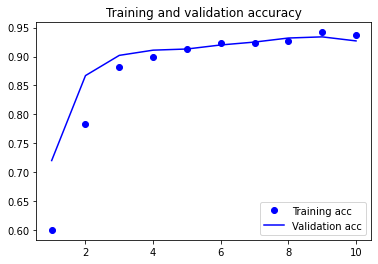

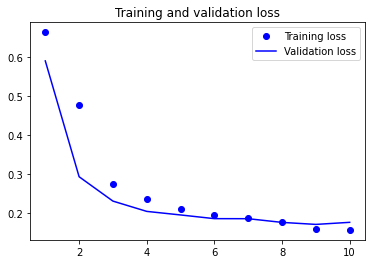

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# classification report and confusion matrix

# if we don't round to a whole number (0 or 1), the confusion matrix won't work!
preds4 = np.round(model.predict(x_val),0)

In [ ]:
# confusion matrix 
matrix = confusion_matrix(y_val, preds4)
matrix

array([[430,  61],
       [ 12, 497]])

In [ ]:
# classification report

# more detail on how well things were predicted
print(classification_report(y_val, preds4))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92       491
           1       0.89      0.98      0.93       509

    accuracy                           0.93      1000
   macro avg       0.93      0.93      0.93      1000
weighted avg       0.93      0.93      0.93      1000



## **Monster Model**

In [ ]:
# define model
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Conv1D(filters=64, kernel_size=3))
model.add(MaxPooling1D(32))
model.add(Bidirectional(LSTM(64,
                            return_sequences=True, # remember, if stacking layers, you need to return sequences!
                            activation='relu',
                            recurrent_dropout=0.2)))
model.add(GRU(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_data=(x_val, y_val))

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 100, 100)          1000000   
                                                                 
 conv1d_2 (Conv1D)           (None, 98, 64)            19264     
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 3, 64)            0         
 1D)                                                             
                                                                 
 bidirectional_2 (Bidirectio  (None, 3, 128)           66048     
 nal)                                                            
                                                                 
 gru_5 (GRU)                 (None, 32)                15552     
                                                                 
 dropout_4 (Dropout)         (None, 32)              

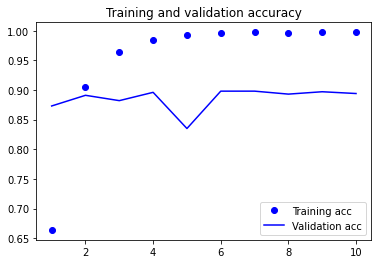

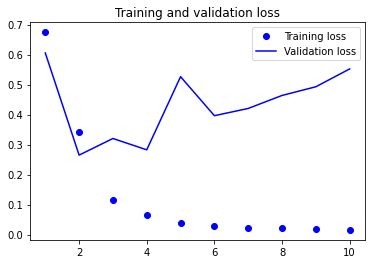

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# classification report and confusion matrix

# if we don't round to a whole number (0 or 1), the confusion matrix won't work!
preds5 = np.round(model.predict(x_val),0)

In [ ]:
# confusion matrix 
matrix = confusion_matrix(y_val, preds5)
matrix

array([[435,  56],
       [ 50, 459]])

In [ ]:
# classification report 

# more detail on how well things were predicted
print(classification_report(y_val, preds5))

              precision    recall  f1-score   support

           0       0.90      0.89      0.89       491
           1       0.89      0.90      0.90       509

    accuracy                           0.89      1000
   macro avg       0.89      0.89      0.89      1000
weighted avg       0.89      0.89      0.89      1000



# **Part III: Analysis**

- Using max length 50 and 1000 max words, the highest accuracy among the five models is 0.87, while it's 0.93 with max length 100 and 10000 max words. So, we will look through five models with max length 100 and 10000 max words.
- Initially, the simplee RNN model was built and it has got accuracy 0.87, precision 0.88, recall 0.87. The accuracy doesn't look consistent during iterations. 
- To improve accuracy of a model, we tried to build a LSTM model and a GRU model. Since they have more FFNNs in their models than the simple RNN, the accuracy of the models has increased to accuracy 0.92, precision 0.92, and recall 0.92. The GRU model is slightly less overfitting than the LSTM model.    
- We built a pre-trained model by loading embedding vectors from a pre-computed embedding space known to be highly structured and to exhibit useful properties that capture generic aspects of language structure. As a result, the model accuracy could slightly improve to accuracy 0.93, precision 0.93, and recall 0.93. Since we have quite enough samples of 4000, it was not so powerful. However, the accuracy of the train and validation are consistent.  
- Lastly, we built a monster model which has all of the above with stacked layers etc. but the accuracy was worse because the model did too much feature engineering.  
- The pre-trained is our best model. By using this model, we will be able to recognize the political views of news channels or celebrities, thereby avoiding just believing what they say and being sensible of the facts.

# **Reference**

Gabriela Schulte, Poll: Roughly half say CNN, FOX have partisan media bias, (2021, March 21) Retrieved from: https://thehill.com/hilltv/what-americas-thinking/544766-poll-roughly-half-say-cnn-fox-have-partisan-media-bias